# 9.1 A Brief matplotlib API Primer

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
data = np.arange(20)
data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

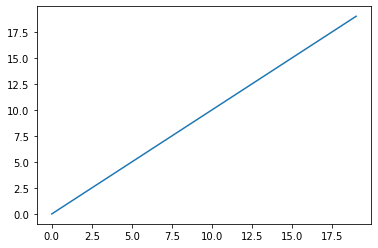

In [4]:
plt.plot(data)

### Figures and Subplots

In [5]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

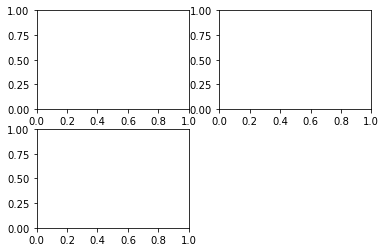

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
#This means that the figure should be 2 × 2 (so up to four plots in total), and we’re
#selecting the first of four subplots (numbered from 1)

In [7]:
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")

In [8]:
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);

In [9]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

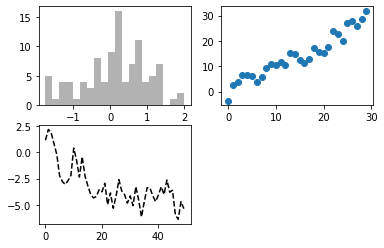

In [14]:
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed");
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));
plt.show()

### Colors, Markers, and Line Styles

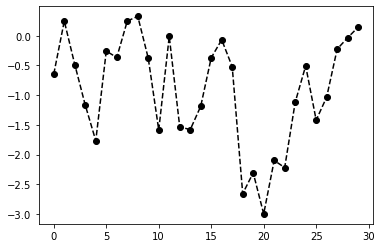

In [4]:
fig = plt.figure()

ax = fig.add_subplot()

ax.plot(np.random.standard_normal(30).cumsum(), color="black", linestyle="dashed", marker="o")

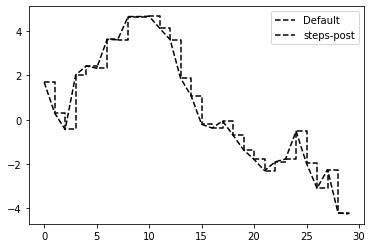

In [6]:
fig = plt.figure()
ax = fig.add_subplot()

data = np.random.standard_normal(30).cumsum()

ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed",
        drawstyle="steps-post", label="steps-post");

ax.legend()

### Ticks, Labels and Legends

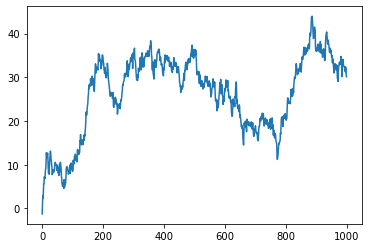

In [7]:
fig, ax = plt.subplots()

ax.plot(np.random.standard_normal(1000).cumsum());

Text(0.5, 1.0, 'My first matplotlib plot')

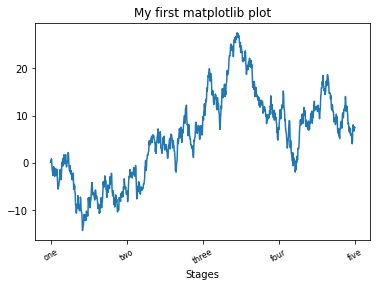

In [9]:
fig, ax = plt.subplots()

ax.plot(np.random.standard_normal(1000).cumsum());

ticks = ax.set_xticks([0, 250, 500, 750, 1000])

labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)

ax.set_xlabel("Stages")

ax.set_title("My first matplotlib plot")

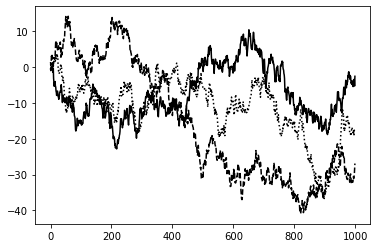

In [10]:
#Adding legends

fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");

ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed", label="two");

ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted", label="three");

### Annotations and Drawing on a Subplot

In [ ]:
import pandas as pd
from datetime import datetime

fig, ax = plt.subplots()
data = pd.read_csv("examples.csv", index_col=0, parse_dates=True)
spx = data["SPX"]
spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
        xytext=(date, spx.asof(date) + 225),
        arrowprops=dict(facecolor="black", headwidth=4, width=2,
                        headlength=4),
                        horizontalalignment="left", verticalalignment="top")
    
# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])
ax.set_title("Important dates in the 2008-2009 financial crisis")

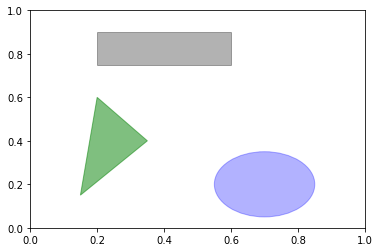

In [14]:
fig, ax = plt.subplots()
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to file

In [ ]:
fig.savefig("figpath.svg")

fig.savefig("figpath.png", dpi=400)

### Matplotlib Configuration

In [ ]:
plt.rc("figure", figsize=(10, 10))

plt.rc("font", family="monospace", weight="bold", size=8)

# 9.2 Plotting with pandas ans seaborn

### Line Plots

<AxesSubplot:>

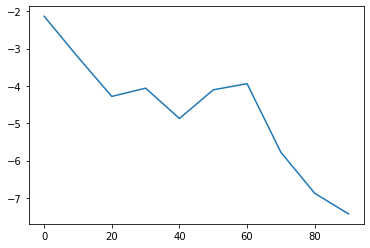

In [15]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<AxesSubplot:>

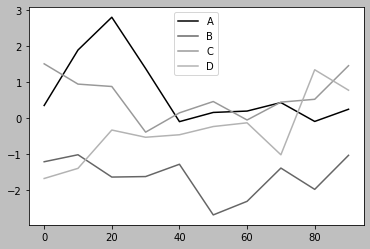

In [16]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))

plt.style.use('grayscale')

df.plot()

### Bar Plots

<AxesSubplot:>

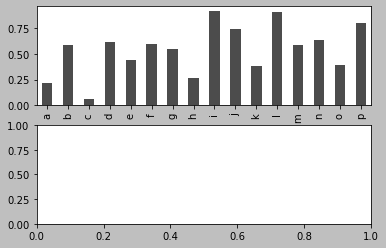

In [17]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

data.plot.bar(ax=axes[0], color="black", alpha=0.7)

In [18]:
data.plot.bar(ax=axes[1], color="black", alpha=0.7)

<AxesSubplot:>

In [4]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.737131,0.425308,0.190936,0.571377
two,0.614480,0.567173,0.656974,0.506129
three,0.818507,0.674841,0.447949,0.617547
four,0.328905,0.334857,0.538316,0.415930
five,0.017926,0.303581,0.988171,0.298841
six,0.577379,0.913401,0.515664,0.780136


<AxesSubplot:>

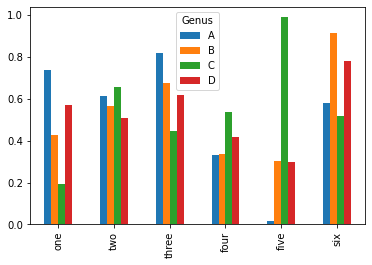

In [5]:
df.plot.bar()

<AxesSubplot:>

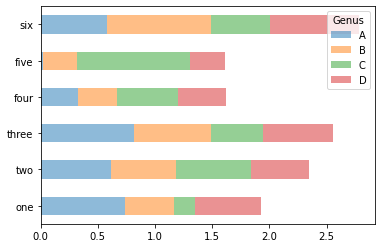

In [6]:
df.plot.barh(stacked=True, alpha=0.5)

### Histograms and Density Plots

<AxesSubplot:ylabel='Count'>

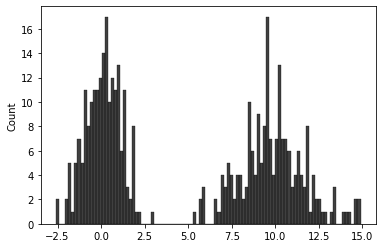

In [9]:
import seaborn as sns

comp1 = np.random.standard_normal(200)

comp2 = 10 + 2 * np.random.standard_normal(200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100, color="black")